# Week8-机器学习-计算机视觉应用初体验


## 任务一：静态人脸检测

### 1. 安装opencv
- 安装：`pip install opencv-contrib-python`
- 验证：`import cv2`不报错

In [1]:
import cv2

### 2. 选择分类器
- 用的是opencv中的harr分类器分类器，也可用其他的，常用是这个，选择分类器的时候注意决定路径的选择，找到cv2的安装文件夹，可搜索cv2

In [2]:
#选择分类器，注意路径为绝对值，安装了opencv后，可以在电脑中搜素cv2，找到data文件夹的haar分类器文件
face_cascade = cv2.CascadeClassifier(r'D:\Python\python code\NIIT_class\venv\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')

### 3. 读取图像并灰度处理
- 将图像进行灰度处理，方便后面的检测。

In [3]:
# 读取照片
image = cv2.imread('./img/guailing.jpg')
# 将图像进行灰度处理，方便后面的检测。
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("test",gray)
cv2.waitKey(0)  # 手动退出

-1

### 4. 调用检测函数
- 调用级联分类器下的检测函数detectMultiScale，函数有多个参数，参数的调试会影响识别的准确率，可以手动修改一下。
- image–待检测图片，一般为灰度图像加快检测速度；
- scaleFactor–表示在前后两次相继的扫描中，搜索窗口的比例系数。默认为1.1即每次搜索窗口依次扩大10%;
- minNeighbors–表示构成检测目标的相邻矩形的最小个数(默认为3个)。
- flags–可不设置，使用默认值
- minSize和maxSize用来限制得到的目标区域的范围。

In [13]:
faces = face_cascade.detectMultiScale(gray,
                                      scaleFactor = 1.1,
                                      minNeighbors = 5,
                                      minSize = (5,5),
                                      flags = cv2.CASCADE_SCALE_IMAGE)

### 5. 调用rectangle函数画出人脸所在位置

In [14]:
#矩形的各种参数，image图像，xy，矩形的左上角和右下角坐标，矩形颜色，线条宽度
for(x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+w),(0,255,0),2)

cv2.imshow("test",image)
cv2.waitKey(0)
#Esc退出

27

## 任务二：动态人脸检测

### 1. 测试电脑摄像头

In [1]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
 
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):    # 按字母q退出
        break
cap.release()
cv2.destroyAllWindows()

SyntaxError: invalid syntax (Temp/ipykernel_12292/3600541130.py, line 9)

### 2. 调用摄像头，实时检测人脸

In [10]:
#使用opencv+python实现最简单摄像头实时人脸识别（适合入门）
import cv2
cap = cv2.VideoCapture(0)
face = cv2.CascadeClassifier(r'D:\Python\python code\NIIT_class\venv\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
while(1):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    faces = face.detectMultiScale(frame,1.1,5,0,(200,200))
    for (x,y,w,h) in faces:
        img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),2)
        gray_roi = frame[y:y+h,x:x+h]
        cv2.imwrite('myface.jpg',gray_roi)
        # print('Image saved!!')
    cv2.imshow('摄像头',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # 按字母q退出
        break
print('Image saved!!')  # 保存图片，覆盖，留了最后一张       
cap.release()

cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


## 任务三：图片风格迁移

- 在软件开发中，我们经常复用开源软件或者库，避免了相同功能的代码重复开发，减少了大量的重复劳动，也有效缩短了软件开发周期。代码复用，对软件产业的蓬勃发展，有着极大的助推作用。


- 相应的，Tensorflow Hub 目的是为了更好的复用已训练好且经过充分验证的模型，可节省海量的训练时间和计算资源。这些预训练好的模型，可以进行直接部署，也可以进行迁移学习（Transfer Learning）。对个人开发者来说，Tensorflow Hub 是非常有意义的，他们可以快速复用像谷歌这样的大公司使用海量计算资源训练的模型，而他们个人去获取这些资源是很不现实的。


- Tensorflow Hub的网址为：`tfhub.dev`，国内如果无法下载模型，可以将网址替换为`hub.tensorflow.google.cn`即可


- 比如，某个模型的网址是https://tfhub.dev/google/wiki40b-lm-ru/1 无法在国内下载，或者下载时间过长。将网址替换为https://hub.tensorflow.google.cn/google/wiki40b-lm-ru/1 即可在国内下载。


- 为了能够实现预训练好的模型，需要安装tensorflow-hub包(假设tensorflow已经安装过了)，命令如下`pip install tensorflow-hub`

### 1. tensorflow-hub的安装和加载

In [6]:
import tensorflow_hub as hub

ModuleNotFoundError: No module named 'tensorflow_hub'

### 2. 预训练模型的获取与加载

- 假设我们想利用深度学习模型实现风格迁移，必须首先知道有哪些模型可以用于风格迁移。登录tensorflow-hub网址，查看有哪些适合于风格迁移的模型。网址如下：[tensorflow-hub网站上搜索style transfer](https://hub.tensorflow.google.cn/s?module-type=image-style-transfer)
    - magenta/arbitrary-image-stylization-v1-256（下载量最大，我们用这个）
    - cartoongan
    - boundless-quarter
    - arbitrary-image-stylization-inceptionv3
    - arbitrary-image-stylization-inceptionv3-dynamic-shapes

#### 方式1：用网址直接加载
- 然后在代码中加入这个网址即可。此法较为简单，但是网速不好时，无法下载。

In [9]:
hub_handle = 'https://hub.tensorflow.google.cn/google/magenta/arbitrary-image-stylization-v1-256/2'
# 加载模型
hub_model = hub.load(hub_handle)
print(hub_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x000001DC0A2D3220>


- 模型自动保存在如下所示的路径下，注意，`AppData`是隐藏起来的。`C:\Users\fan_p\AppData\Local\Temp\tfhub_modules`
- 打开该文件夹下的txt文件，可以看到以下信息。
    - Module: https://hub.tensorflow.google.cn/google/magenta/arbitrary-image-stylization-v1-256/2
    - Download Time: 2022-04-29 15:17:10.062675
    - Downloader Hostname: LAPTOP-HSQ61ADK (PID:21936)

#### 方式2：手动下载

- 在网站上下载压缩包，解压，放到某个文件夹，比如，放到`D:\MyCode\FF_jupyter\00-人工智能导论（48）\week8-应用\model`目录下
- 然后解压，如下图所示，解压之后出现一个saved_model.pb文件和两个文件夹，预训练的模型就保存在`variables`文件夹中
- 解压工具：winrar可能会解压错误，可以使用Bandizip，`zip tool`文件夹有安装包

In [ ]:
hub_handle = r'D:/MyCode/FF_jupyter/00-人工智能导论（48）/week8-应用/style_transfer_model/'

# 然后通过hub.load()函数将这个模型加载到系统
hub_model = hub.load(hub_handle)

In [ ]:
# 打印模型，检查是否加载成功
print(hub_model)

### 3. 图像素材准备

- 模型准备好了，接下来要准备两张图像。
    1. 原图
    2. 风格图片，用于迁移风格
- 在哪里下载世界名画？
    - [中华艺术博物馆](https://www.chineseartsmuseum.com/wzsy)
    - [Discover Art & Artists](https://www.artic.edu/collection)
    - [Rijksmuseum Home](https://www.rijksmuseum.nl/nl)
    - [The Metropolitan Museum of Art](https://www.metmuseum.org/)
    - [The Art Institute of Chicago](https://www.artic.edu/)
    - [The Metropolitan Museum of Art](https://www.metmuseum.org/primer/met-cloisters#welcome-traveler)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

content_image = plt.imread(r'D:\MyCode\FF_jupyter\00-人工智能导论（48）\week8-应用\img\ori.jpg')
style_image = plt.imread(r'D:\MyCode\FF_jupyter\00-人工智能导论（48）\week8-应用\img\2.jpg')

print('原图：\n',content_image.shape)
print('风格图：\n',style_image.shape)

原图：
 (581, 772, 3)
风格图：
 (1112, 843, 3)


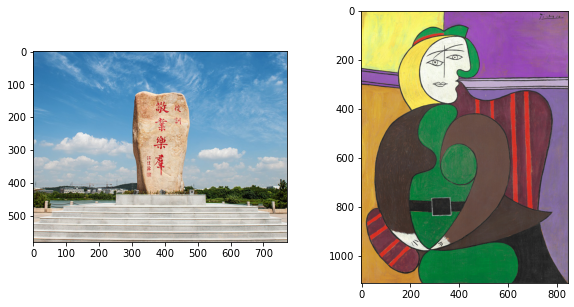

In [11]:
# 绘图展示下
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(content_image)

plt.subplot(1,2,2)
plt.imshow(style_image)

In [12]:
# 图像标准化，数字转化为0-1之间,增加一个维度，形成4维张量（样本数，长，宽，通道数）
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
content_image.shape, style_image.shape

((1, 581, 772, 3), (1, 1112, 843, 3))

In [13]:
# Optionally resize the images. It is recommended that the style image is about 
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
# 风格图最好转换为（256，256）大小，与训练模型的风格图大小是（256，256）
# 原图可随意
style_image = tf.image.resize(style_image, (256, 256))
style_image.shape

TensorShape([1, 256, 256, 3])

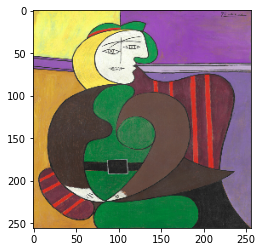

In [14]:
# 展示正方形处理后的风格图
plt.imshow(style_image[0])

### 4. 风格迁移

In [16]:
# 风格迁移
# 之前加载好的模型：hub_model. tf.constant: 生成一个常量张量
outputs = hub_model(tf.constant(content_image), tf.constant(style_image))  

Text(0.5, 1.0, 'stylized image')

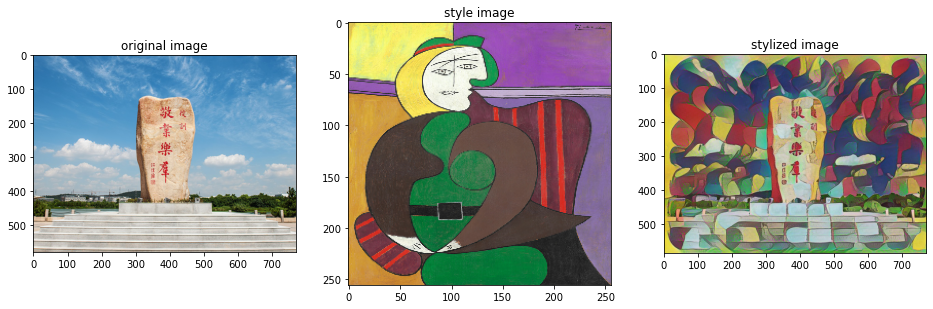

In [17]:
# 绘图展现
plt.figure(figsize=(16,6))

# 原图像
plt.subplot(1,3,1)
plt.imshow(content_image[0])
plt.title('original image')

# 风格图像
plt.subplot(1,3,2)
plt.imshow(style_image[0])
plt.title('style image')

# 迁移后图像
plt.subplot(1,3,3)
plt.imshow(outputs[0][0])
plt.title('stylized image')


有点艺术气息,但是不够完美,同学们可以尝试创作出一幅漂亮的艺术品.